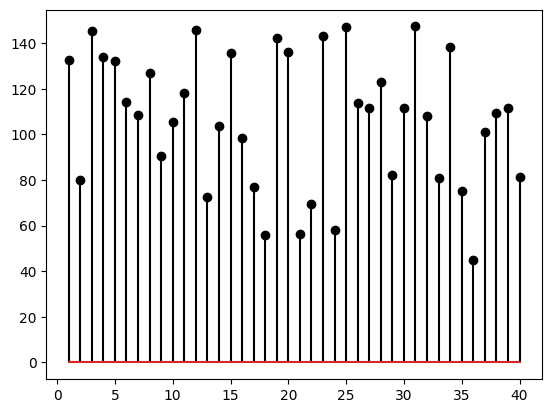

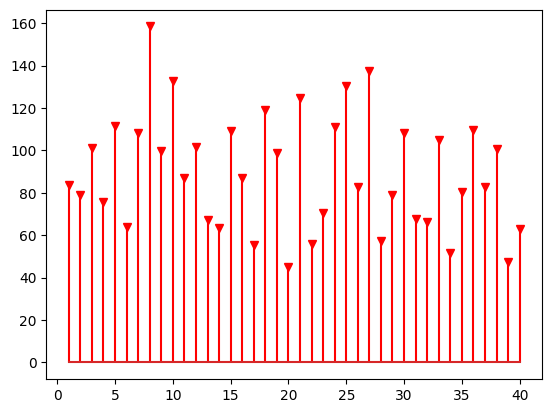

C:\Users\user\AppData\Local\Temp\ipykernel_7816\1847192363.py:37: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(iio.imread(file))


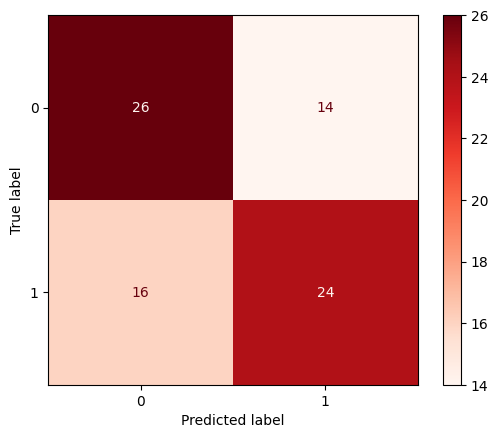

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio as iio
from pathlib import Path
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test = 40 * ["cloudy"] + 40 * ["sunset"]
y_pred = []

x = np.linspace(1, 40, 40)

cloudy_mean = []

for i in range(40):
    directory = 'data/images/c' + str(i + 1) + '.jpg'
    image = mpimg.imread(directory)
    cloudy_mean.append(np.mean(image))

plt.stem(x, cloudy_mean, linefmt='black')
plt.show()

sunset_mean = []

for i in range(40):
    directory = 'data/images/s' + str(i + 1) + '.jpg'
    image = mpimg.imread(directory)
    sunset_mean.append(np.mean(image))

plt.stem(x, sunset_mean, linefmt='red', markerfmt='v')
plt.show()

decision_boundry = 100
images = []

for file in Path("./data/Images").iterdir():
     images.append(iio.imread(file))

for image in images:
    if np.mean(image) <= decision_boundry:
         y_pred.append("sunset")
    else:
         y_pred.append("cloudy")

cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')